In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,precision_score,confusion_matrix
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,RepeatedStratifiedKFold,cross_val_score
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
df = pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df["ph"] = df["ph"].fillna(value=df["ph"].mean())
df["Sulfate"] = df["Sulfate"].fillna(value=df["Sulfate"].mean())
df["Trihalomethanes"] = df["Trihalomethanes"].fillna(value=df["Trihalomethanes"].mean())

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


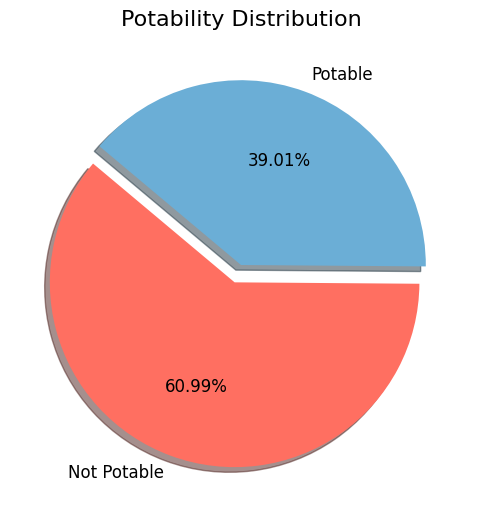

In [21]:
import matplotlib.pyplot as plt

# Calculate the counts for each category
potability_counts = df['Potability'].value_counts()
labels = ['Not Potable', 'Potable']

# Define colors and explode for a nicer look
colors = ['#ff6f61', '#6baed6']
explode = (0.1, 0)  # Slightly explode the first slice

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(potability_counts, labels=labels, autopct='%1.2f%%',
        startangle=140, colors=colors, explode=explode,
        shadow=True, textprops={'fontsize': 12})

# Add title and show plot
plt.title("Potability Distribution", fontsize=16)
plt.show()

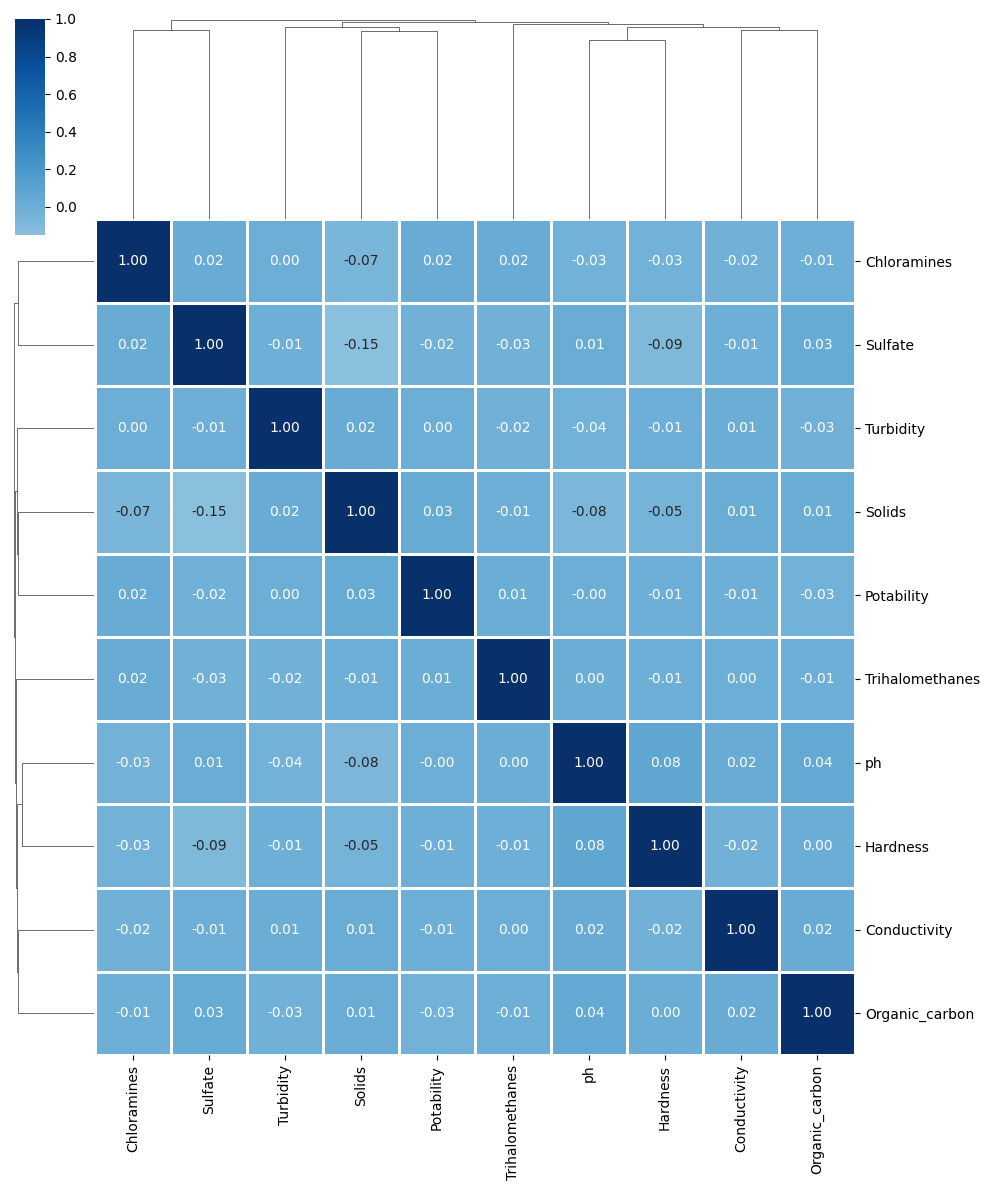

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the clustermap with the 'Blues' colormap
sns.clustermap(
    df.corr(),
    cmap="Blues",  # Blue gradient colormap
    dendrogram_ratio=(0.1, 0.2),
    annot=True,
    fmt=".2f",
    linewidths=0.8,
    figsize=(10, 12),
    cbar_pos=(0.02, 0.8, 0.03, 0.18),  # Adjust the color bar position
    center=0  # Center the colormap at 0 for better distinction
)

# Show the plot
plt.show()

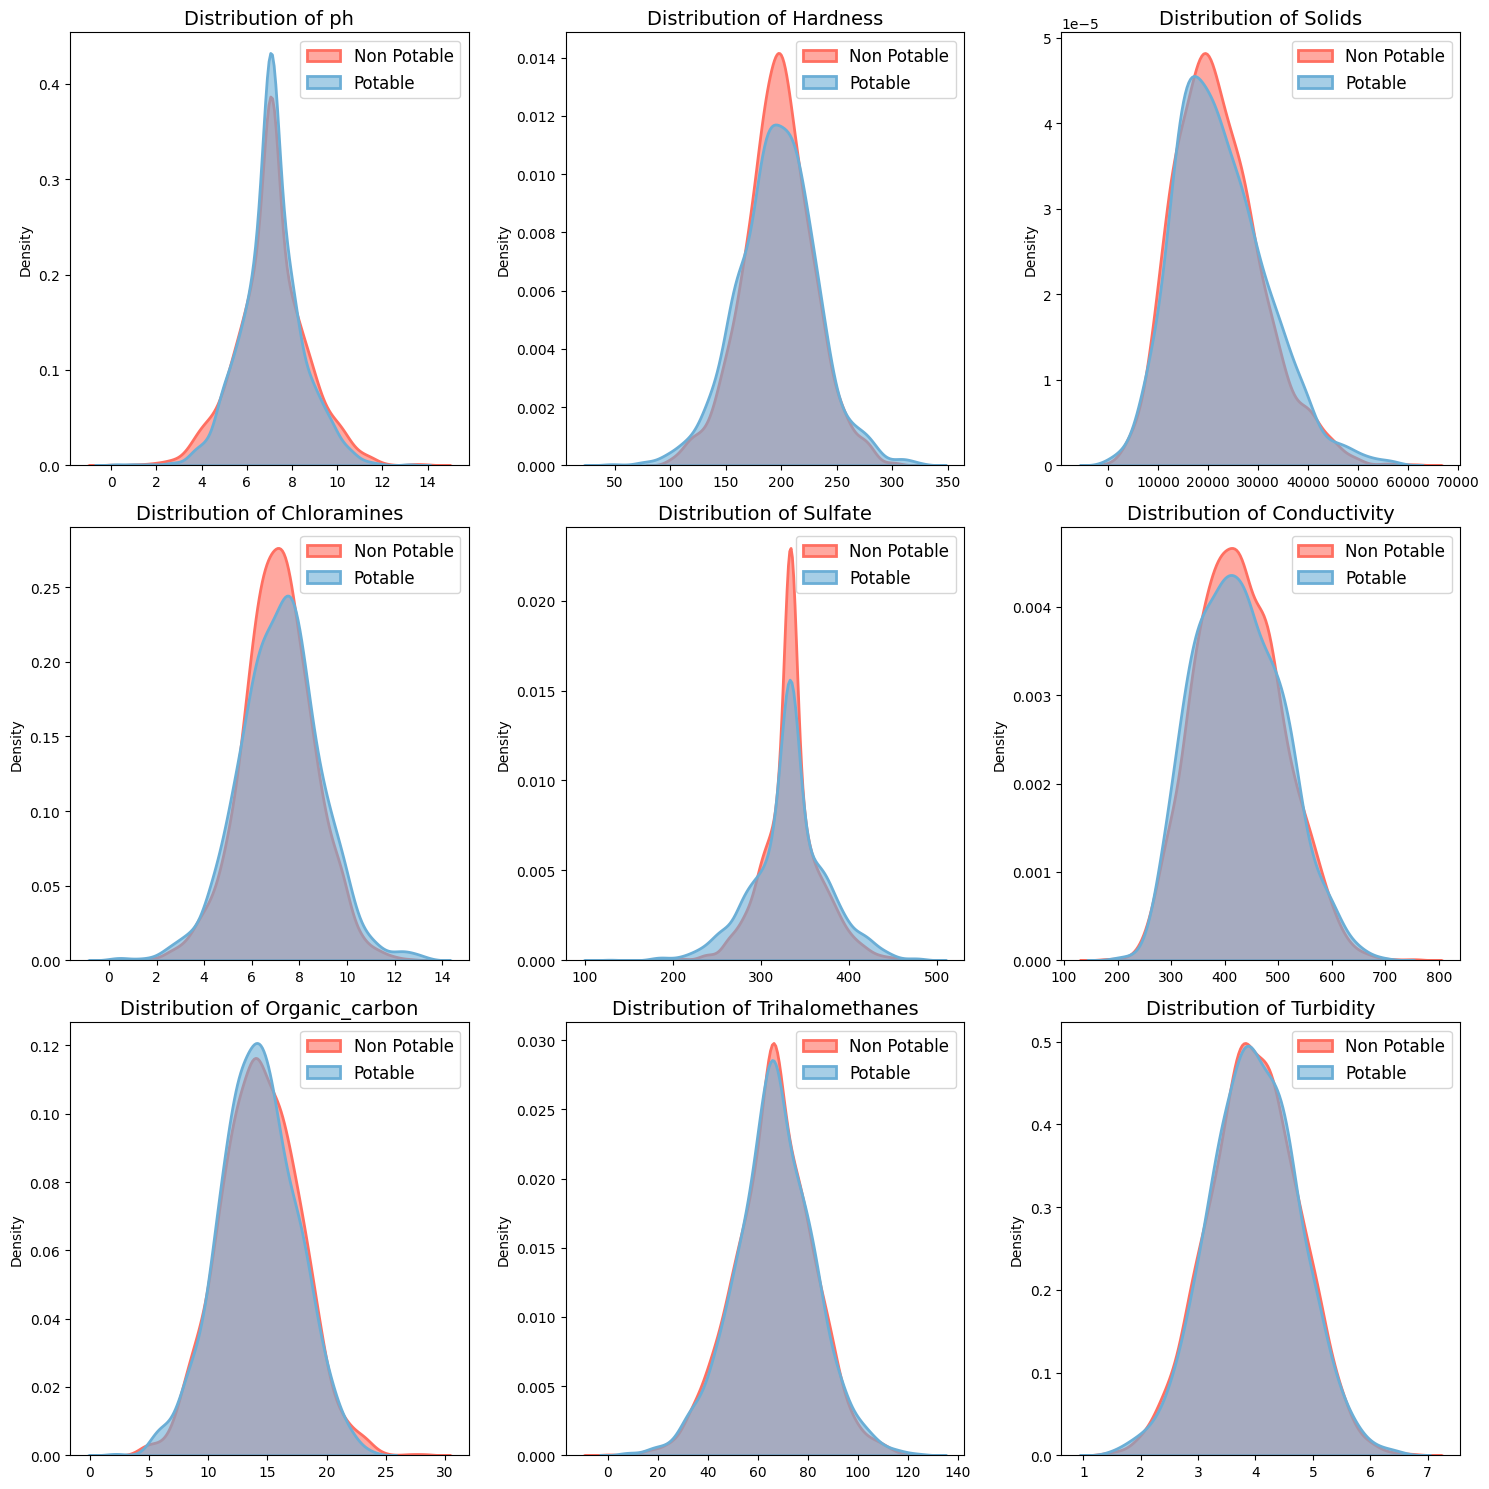

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Split data into potable and non-potable water samples
potability_zero = df.query("Potability == 0")
potable = df.query("Potability == 1")

# Create a 3x3 grid of KDE plots
plt.figure(figsize=(15, 15))
for ax, col in enumerate(df.columns[:9]):
    plt.subplot(3, 3, ax + 1)
    plt.title(f'Distribution of {col}', fontsize=14)

    # KDE plots with improved aesthetics
    sns.kdeplot(
        x=potability_zero[col], label="Non Potable", fill=True,
        color='#FF6F61', alpha=0.6, linewidth=2
    )
    sns.kdeplot(
        x=potable[col], label="Potable", fill=True,
        color='#6BAED6', alpha=0.6, linewidth=2
    )

    plt.legend(loc='best', fontsize=12)
    plt.xlabel("")  # Remove x-axis labels for cleaner look

plt.tight_layout()
plt.show()


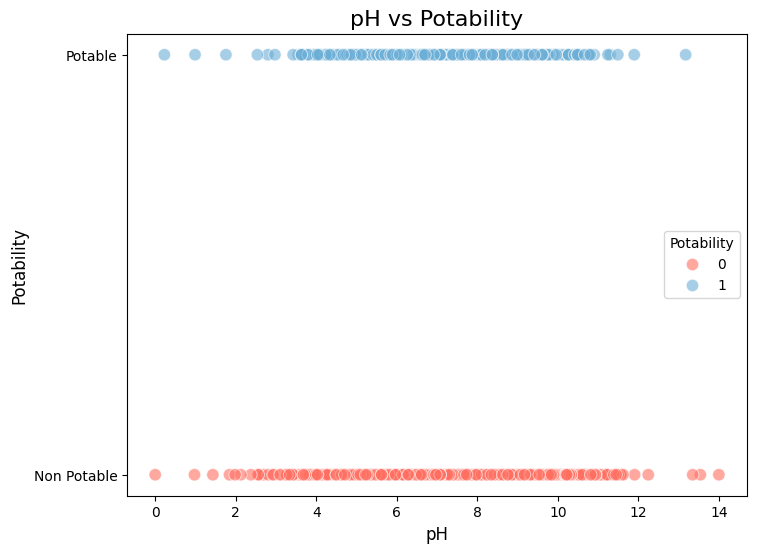

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot with jitter to prevent overlapping
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="ph", y="Potability", data=df,
    alpha=0.6, hue="Potability", palette=["#FF6F61", "#6BAED6"], s=80
)
plt.yticks([0, 1], ["Non Potable", "Potable"])
plt.title("pH vs Potability", fontsize=16)
plt.xlabel("pH", fontsize=12)
plt.ylabel("Potability", fontsize=12)
plt.show()

In [12]:
X = df.drop("Potability",axis=1)
y= df["Potability"]

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)


In [14]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [15]:
models =[
    ("Decision Tree Classifier", DecisionTreeClassifier(max_depth=3)),
    ("Random Forest", RandomForestClassifier())
]

In [16]:
finalResults = []

cmList = []

for name, model in models:
    model.fit(X_train_scaled,y_train)
    model_result = model.predict(X_test_scaled)
    score = precision_score(y_test,model_result)
    cm = confusion_matrix(y_test, model_result)

    finalResults.append((name,score))
    cmList.append((name,cm))
finalResults

[('Decision Tree Classifier', 0.6285714285714286),
 ('Random Forest', 0.5874125874125874)]

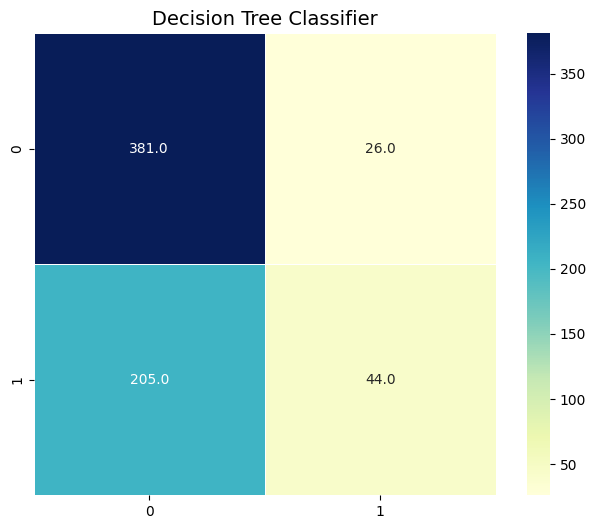

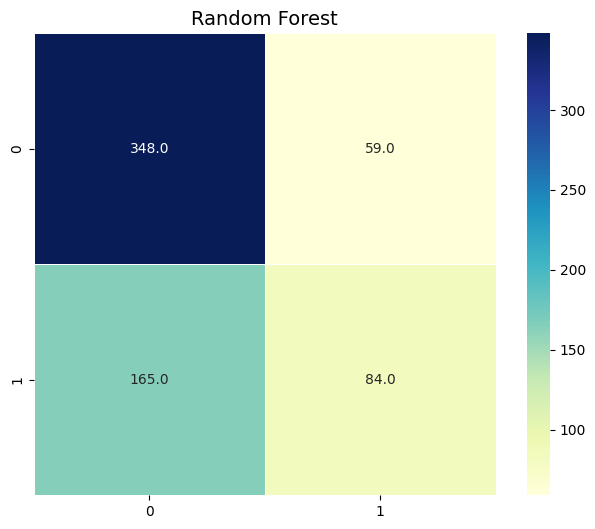

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through the list of confusion matrices (or any other matrices)
for name, matrix in cmList:
    plt.figure(figsize=(8, 6))  # Set figure size for readability
    sns.heatmap(
        matrix, annot=True, linewidths=0.7, fmt=".1f", cmap="YlGnBu",
        cbar=True, square=True
    )
    plt.title(name, fontsize=14)
    plt.show()

In [18]:
model_params = {
    "Random Forest" :
    {
        "model": RandomForestClassifier(),
        "params":
        {
            "n_estimators":[10,50,100,200,500],
            "max_features":["auto","sqrt","log2"],
            "max_depth":list(range(1,15,3))
        }
    }
}
model_params

{'Random Forest': {'model': RandomForestClassifier(),
  'params': {'n_estimators': [10, 50, 100, 200, 500],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth': [1, 4, 7, 10, 13]}}}

In [19]:
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
scores=[]
for model_name,params in model_params.items():
    rs = RandomizedSearchCV(params["model"],params["params"],cv=cv,n_iter=10)
    rs.fit(X,y)
    scores.append([model_name,dict(rs.best_params_),rs.best_score_])
scores

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

[['Random Forest',
  {'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 13},
  0.6695654905976541]]

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


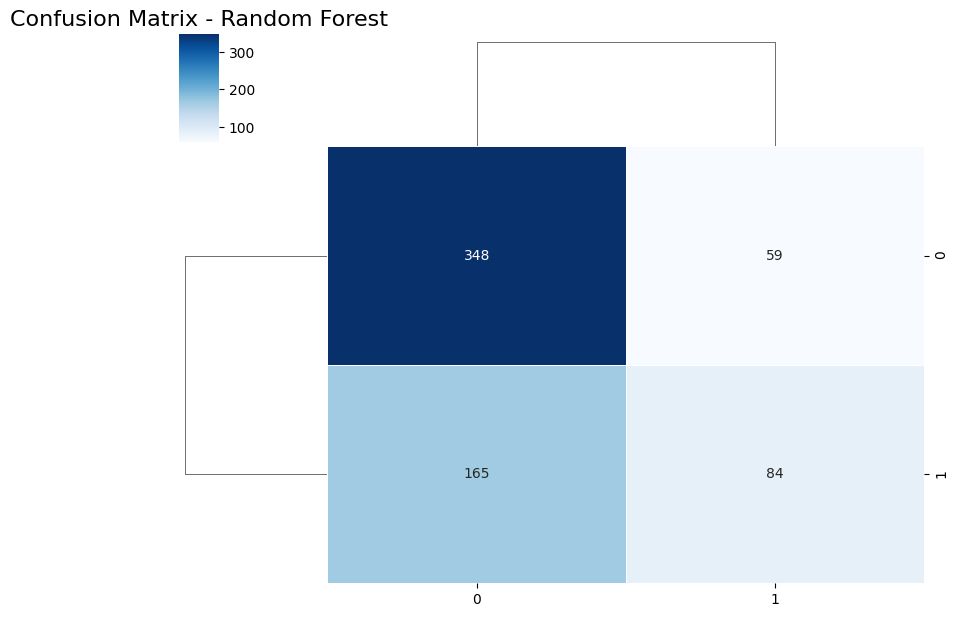

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Using a clustermap for hierarchical clustering
sns.clustermap(
    cm,
    annot=True,
    fmt='g',
    cmap='Blues',
    linewidths=0.5,
    figsize=(8, 6),
    cbar=True,
    square=True
)
plt.title("Confusion Matrix - Random Forest", fontsize=16)
plt.show()



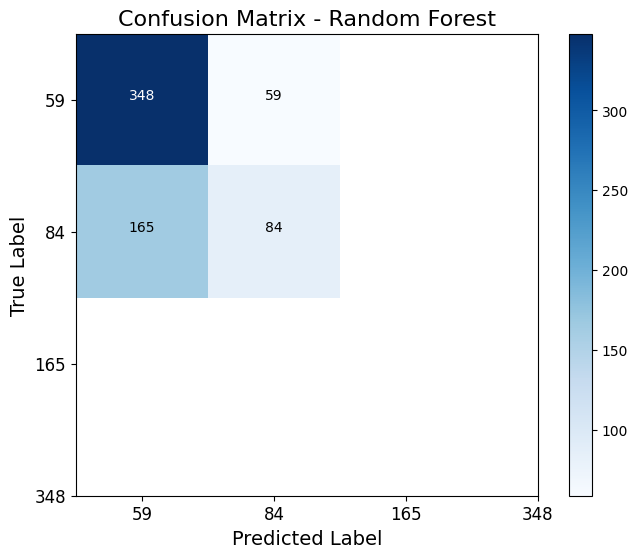

In [30]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')  # Using imshow for custom display
plt.title("Confusion Matrix - Random Forest", fontsize=16)
plt.colorbar()  # Add color bar for reference
tick_marks = np.arange(len(np.unique(cm)))  # Assuming cm is a 2D array of shape (n_classes, n_classes)
plt.xticks(tick_marks, np.unique(cm), fontsize=12)
plt.yticks(tick_marks, np.unique(cm), fontsize=12)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)

# Annotate each cell with the numeric value
thresh = cm.max() / 2.  # Threshold for coloring text
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (4).

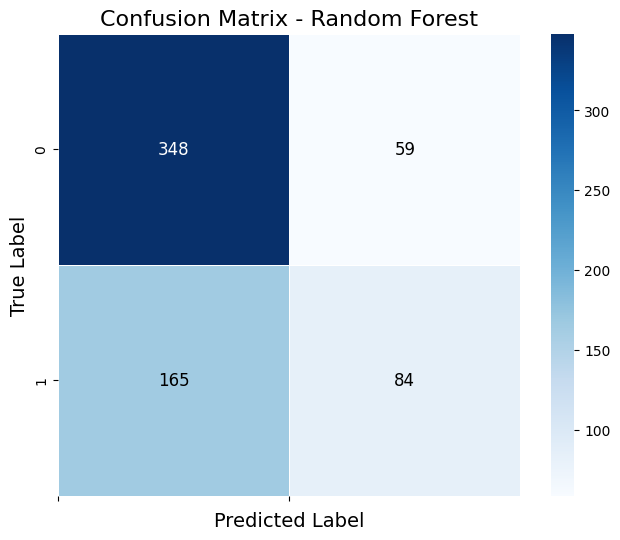

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=False,  # Disable default annotations
    cmap='Blues',
    linewidths=0.5,
    cbar=True,
    square=True
)

# Manually add annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j + 0.5, i + 0.5, cm[i, j],
                 ha='center', va='center',
                 color='white' if cm[i, j] > cm.max() / 2 else 'black',
                 fontsize=12)

plt.title("Confusion Matrix - Random Forest", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(ticks=np.arange(len(cm)), labels=np.unique(cm), fontsize=12)
plt.yticks(ticks=np.arange(len(cm)), labels=np.unique(cm), fontsize=12)
plt.show()